In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv('housing.csv')


What does the dataset look like?

In [3]:
# Display the first few rows of the dataset
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


What are the summary statistics of the numerical features?

In [5]:
# Display summary statistics
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


How is the distribution of the target variable (median_house_value)?

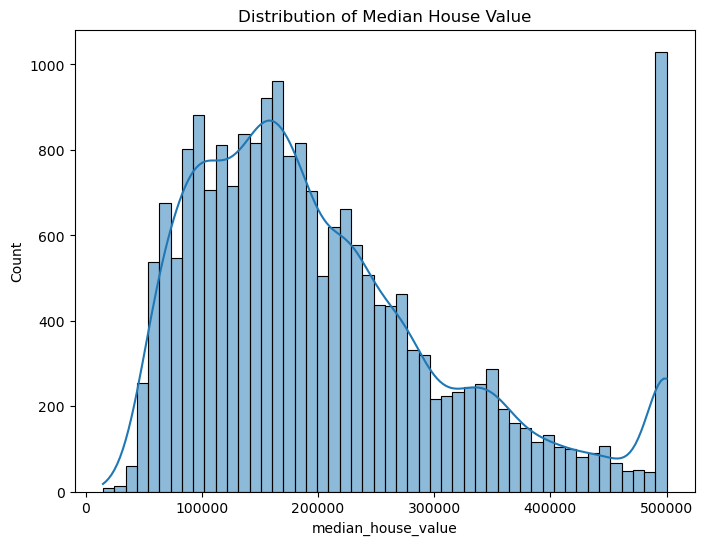

In [7]:
# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.histplot(df['median_house_value'], bins=50, kde=True)
plt.title('Distribution of Median House Value')
plt.show()


What is the correlation between features?

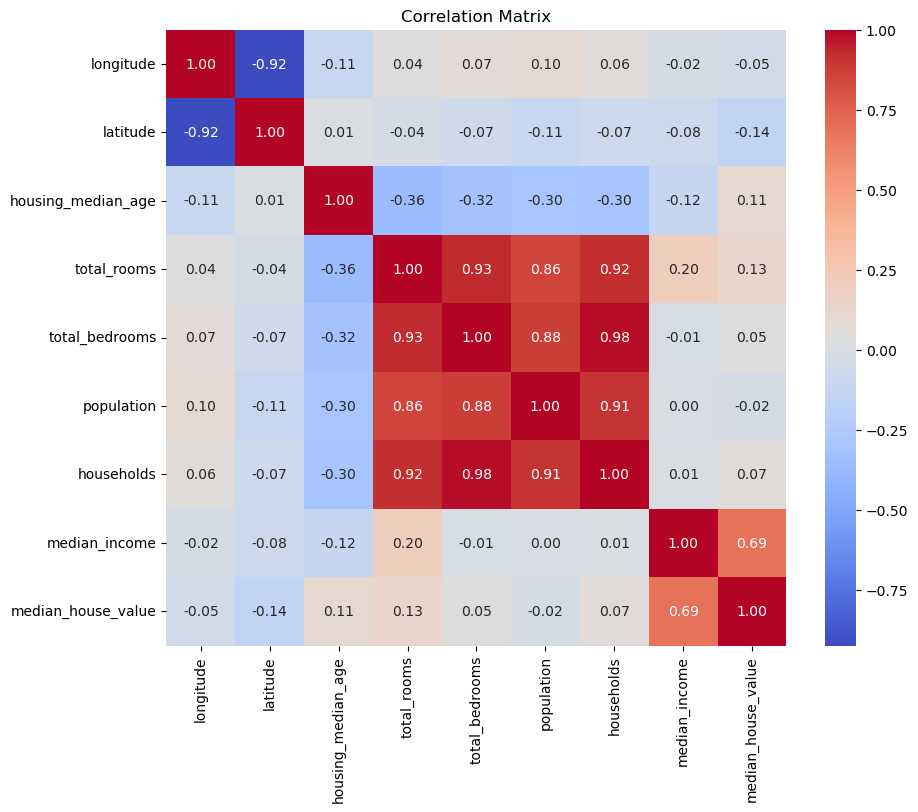

In [9]:
# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate and visualize the correlation matrix
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


How does the median_income relate to median_house_value?

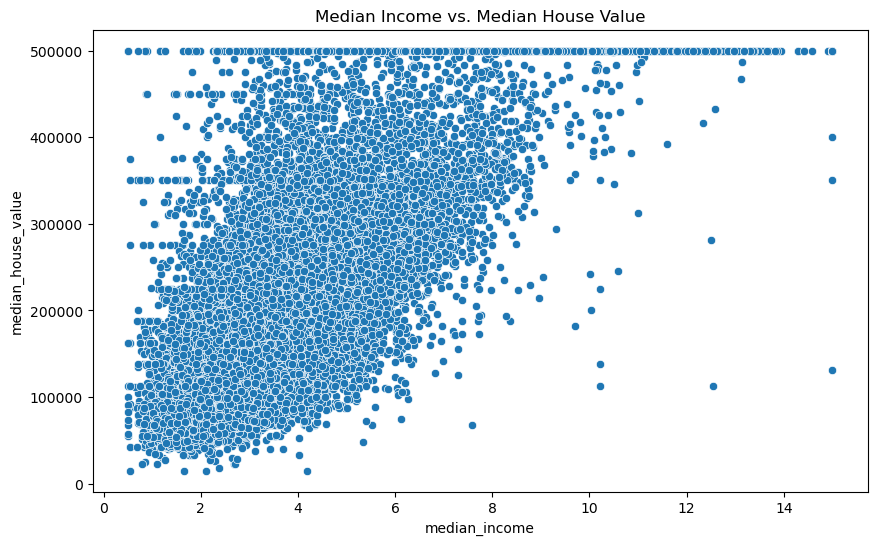

In [11]:
# Scatter plot of median_income vs. median_house_value
plt.figure(figsize=(10, 6))
sns.scatterplot(x='median_income', y='median_house_value', data=df)
plt.title('Median Income vs. Median House Value')
plt.show()


Splitting the Data and Training the Linear Regression Model

In [13]:
# Selecting features and target variable
X = df[['median_income']]
y = df['median_house_value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

What are the coefficients of the linear regression model?

In [15]:
# Display the coefficients of the linear regression model
print(f'Intercept: {model.intercept_}')
print(f'Coefficient: {model.coef_[0]}')


Intercept: 44459.72916907875
Coefficient: 41933.84939381272


How well does the model perform on the test set?

In [17]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')


Mean Squared Error on Test Set: 7091157771.76555


Are there any geographical patterns in housing prices?

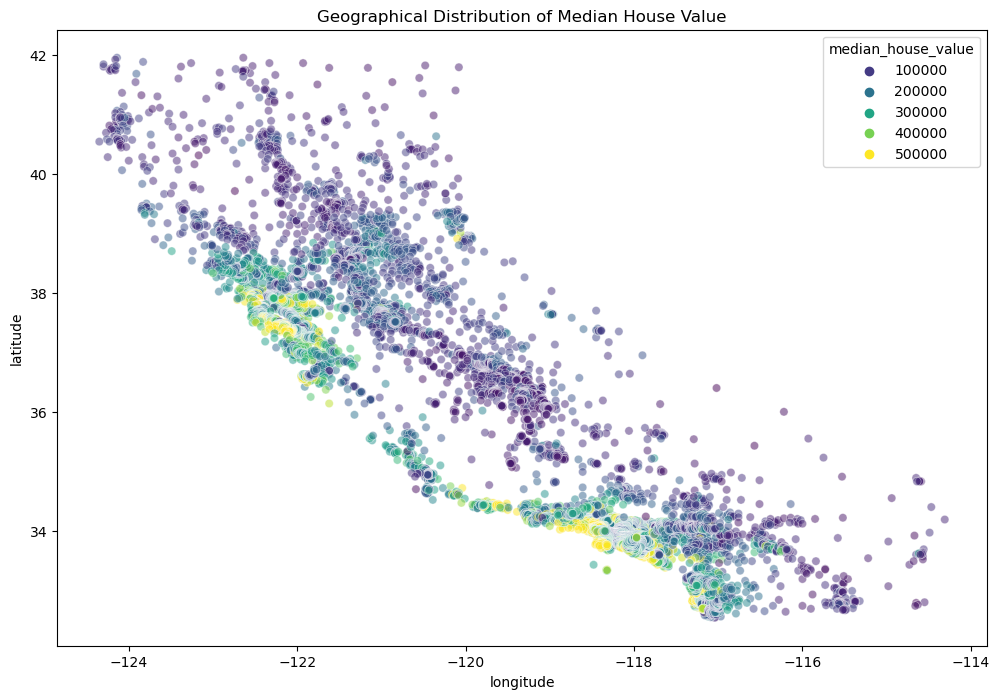

In [19]:
# Scatter plot of latitude and longitude colored by median house value
plt.figure(figsize=(12, 8))
sns.scatterplot(x='longitude', y='latitude', hue='median_house_value', data=df, alpha=0.5, palette='viridis')
plt.title('Geographical Distribution of Median House Value')
plt.show()


How do other features contribute to predicting house values?

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


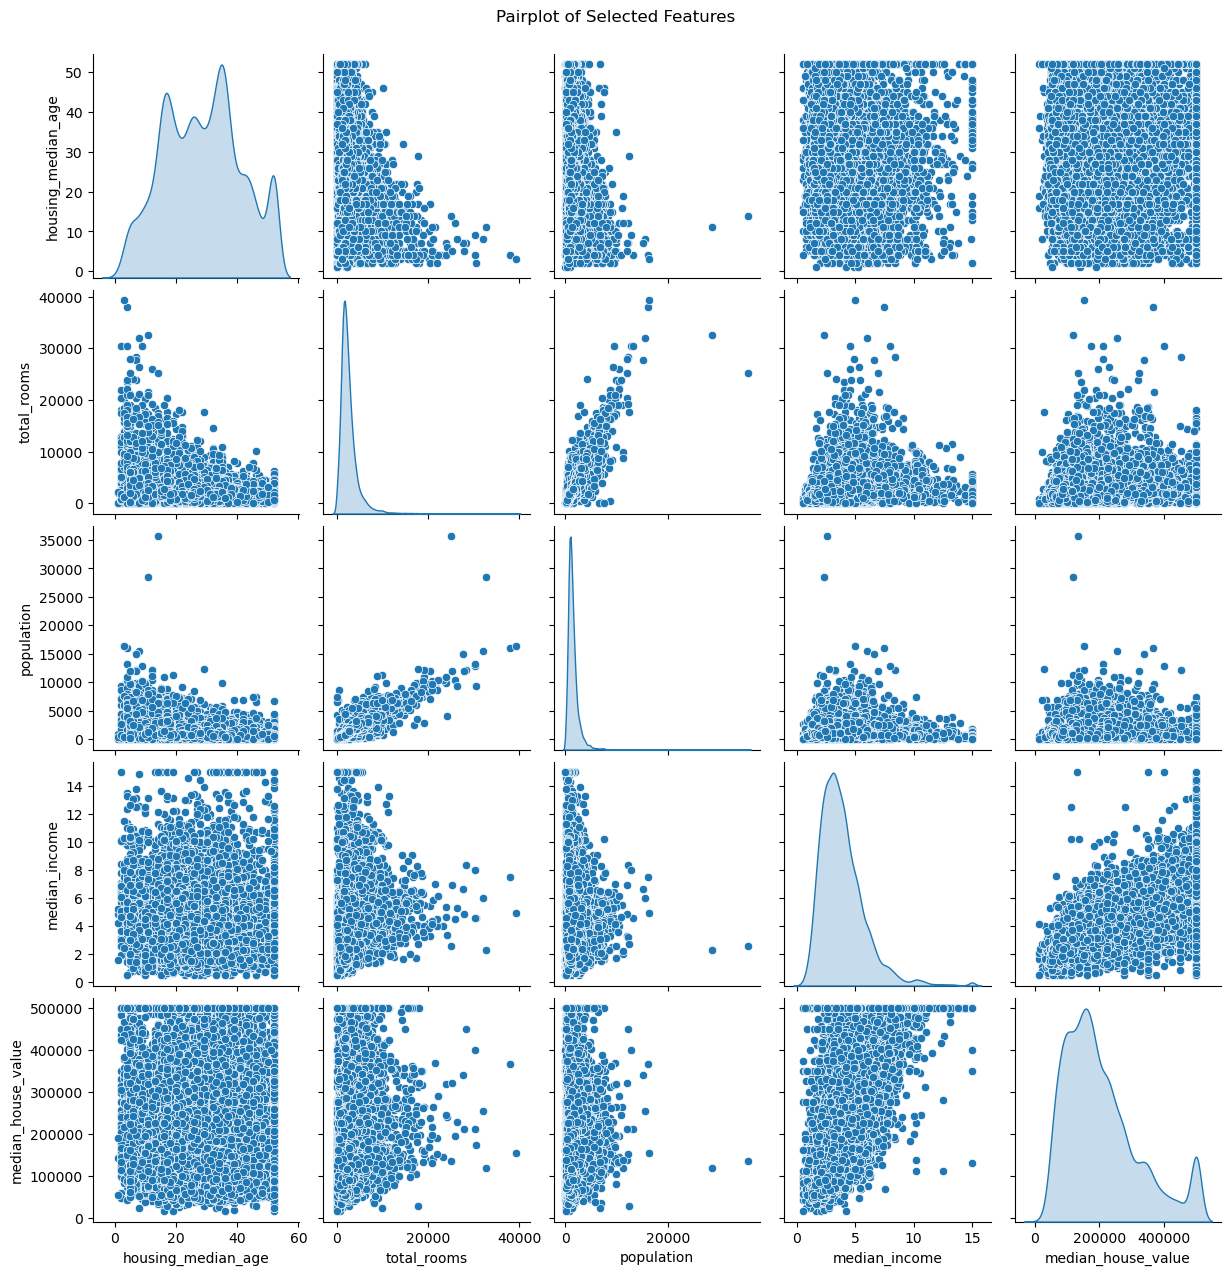

In [21]:
# Pairplot for selected features
selected_features = ['housing_median_age', 'total_rooms', 'population', 'median_income', 'median_house_value']
sns.pairplot(df[selected_features], diag_kind='kde')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()


How can we interpret the coefficients of the linear regression model?

In [23]:
# Interpretation of coefficients
print(f'For a one-unit increase in median_income, the predicted change in median_house_value is {model.coef_[0]:.2f}.')


For a one-unit increase in median_income, the predicted change in median_house_value is 41933.85.


What are the predicted house values for a subset of the test set?

In [25]:
# Display actual vs. predicted values for a subset of the test set
subset_indices = np.random.choice(len(y_test), size=20, replace=False)
subset_actual = y_test.iloc[subset_indices]
subset_predicted = pd.Series(y_pred[subset_indices], index=subset_actual.index)

subset_comparison = pd.DataFrame({'Actual': subset_actual, 'Predicted': subset_predicted})
print(subset_comparison)


         Actual      Predicted
15326  173600.0  169070.356028
6913   282400.0  304021.870147
1712   161000.0  211029.365731
17592  327600.0  230541.185854
18332  425000.0  221827.331950
2202    89300.0  244157.106752
2959    73000.0  151994.892555
14497  204200.0  170697.389384
4193   204200.0  177834.530551
16426   96300.0  129518.349279
19453  137600.0  228398.366150
5760   292600.0  225823.627797
2232    79500.0  163023.494945
17952  247800.0  203024.193882
2171    84500.0  187928.008100
11145  181500.0  244274.521531
803    350000.0  193496.823300
16440  120700.0  179163.833577
10376  484100.0  470218.295449
4484   112500.0  140744.040762


How well does the model generalize to unseen data?

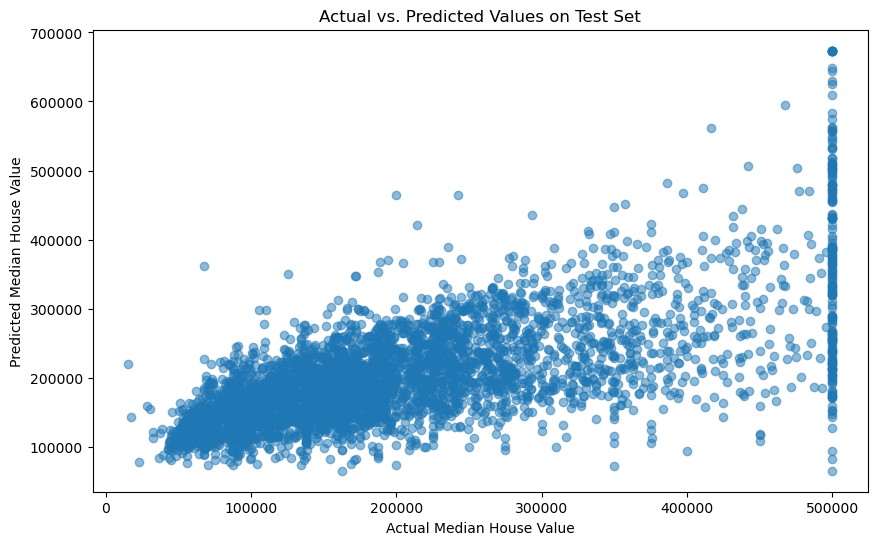

In [27]:
# Scatter plot of actual vs. predicted values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Actual vs. Predicted Values on Test Set')
plt.show()


What are some potential areas for model improvement?

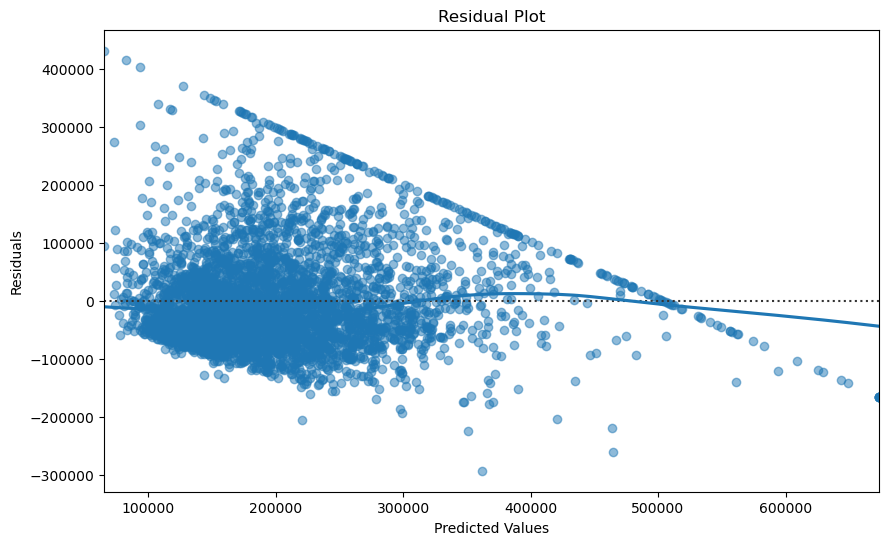

In [29]:
# Residual plot to identify patterns in errors
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=y_test - y_pred, lowess=True, scatter_kws={'alpha': 0.5})
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


Can we improve the model by considering additional features?

In [31]:
# Adding more features to the model
additional_features = ['housing_median_age', 'total_rooms', 'population', 'households']
X_additional = df[additional_features]

# Splitting the data with additional features
X_train_add, X_test_add, _, _ = train_test_split(X_additional, y, test_size=0.2, random_state=42)

# Training a new model with additional features
model_additional = LinearRegression()
model_additional.fit(X_train_add, y_train)

# Evaluating the new model
y_pred_add = model_additional.predict(X_test_add)
mse_add = mean_squared_error(y_test, y_pred_add)
print(f'Mean Squared Error with Additional Features: {mse_add}')


Mean Squared Error with Additional Features: 11620704330.92094


How does the new model compare to the previous one?

In [33]:
# Comparing models
print(f'Mean Squared Error (Original Model): {mse}')
print(f'Mean Squared Error (Model with Additional Features): {mse_add}')


Mean Squared Error (Original Model): 7091157771.76555
Mean Squared Error (Model with Additional Features): 11620704330.92094


How can feature scaling impact the performance of the model?

In [35]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a new model with scaled features
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

# Evaluate the model with scaled features
y_pred_scaled = model_scaled.predict(X_test_scaled)
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
print(f'Mean Squared Error with Scaled Features: {mse_scaled}')


Mean Squared Error with Scaled Features: 7091157771.76555


How does regularization (Lasso or Ridge) affect the model?

In [37]:
from sklearn.linear_model import Lasso, Ridge

# Train Lasso regression model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

# Train Ridge regression model
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print(f'Mean Squared Error (Lasso): {mse_lasso}')
print(f'Mean Squared Error (Ridge): {mse_ridge}')


Mean Squared Error (Lasso): 7091157505.984827
Mean Squared Error (Ridge): 7091156486.640169


Can we interpret the impact of features in the regularized models?

In [39]:
# Display coefficients of the Lasso model
lasso_coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso_model.coef_})
print('Lasso Coefficients:')
print(lasso_coefficients)

# Display coefficients of the Ridge model
ridge_coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': ridge_model.coef_})
print('\nRidge Coefficients:')
print(ridge_coefficients)


Lasso Coefficients:
         Feature   Coefficient
0  median_income  79851.856443

Ridge Coefficients:
         Feature   Coefficient
0  median_income  79851.472846


How do we interpret the impact of features after regularization?

In [41]:
# Compare coefficients before and after regularization
coefficients_comparison = pd.DataFrame({
    'Feature': X.columns,
    'Original Coefficient': model.coef_,
    'Lasso Coefficient': lasso_model.coef_,
    'Ridge Coefficient': ridge_model.coef_
})
print(coefficients_comparison)


         Feature  Original Coefficient  Lasso Coefficient  Ridge Coefficient
0  median_income          41933.849394       79851.856443       79851.472846


How does cross-validation help in model selection?

In [43]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the original linear regression model
cv_scores = cross_val_score(LinearRegression(), X, y, scoring='neg_mean_squared_error', cv=5)
average_mse_cv = -np.mean(cv_scores)
print(f'Average Cross-Validation Mean Squared Error: {average_mse_cv}')


Average Cross-Validation Mean Squared Error: 7231529493.564786


Can we improve the model by introducing polynomial features?

In [45]:
from sklearn.preprocessing import PolynomialFeatures

# Adding polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Splitting the data with polynomial features
X_train_poly, X_test_poly, _, _ = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Train a polynomial regression model
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

# Evaluate the polynomial regression model
y_pred_poly = model_poly.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
print(f'Mean Squared Error (Polynomial Regression): {mse_poly}')


Mean Squared Error (Polynomial Regression): 7032732680.932144


How does the polynomial regression model compare to the linear regression model?

In [47]:
# Compare linear and polynomial regression models
print(f'Mean Squared Error (Linear Regression): {mse}')
print(f'Mean Squared Error (Polynomial Regression): {mse_poly}')


Mean Squared Error (Linear Regression): 7091157771.76555
Mean Squared Error (Polynomial Regression): 7032732680.932144


What are the most important features in predicting house values?

In [49]:
from sklearn.ensemble import RandomForestRegressor

# Train a random forest regressor to assess feature importance
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Display feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print('Feature Importance:')
print(feature_importance)


Feature Importance:
         Feature  Importance
0  median_income         1.0


How can we interpret the model predictions using SHAP values?

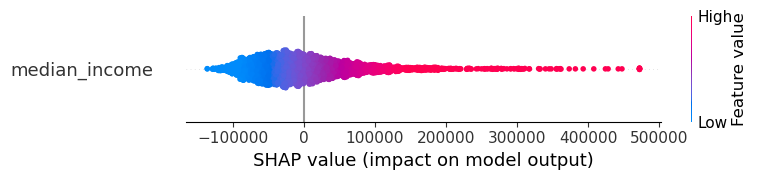

In [51]:
import shap

# Explain model predictions using SHAP values
explainer = shap.Explainer(model_scaled, X_train_scaled)
shap_values = explainer.shap_values(X_test_scaled)

# Summary plot of SHAP values
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns)
